# DO WITH 25-35-40-45 bots also

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")

In [5]:
size = 40

In [6]:
def build_scores(size):
    scores = [pd.DataFrame({'t': list(range(10001))})]
    for i in range(1, 11):
        scores.append(pd.DataFrame({"Score"+str(i):pd.read_csv("experiments_settings/outputs/strategy4/size_" + str(size) + "_seed_" + str(i) + ".txt", sep="\t")["Score"]}))
    scores = pd.concat(scores, axis=1)
    return scores

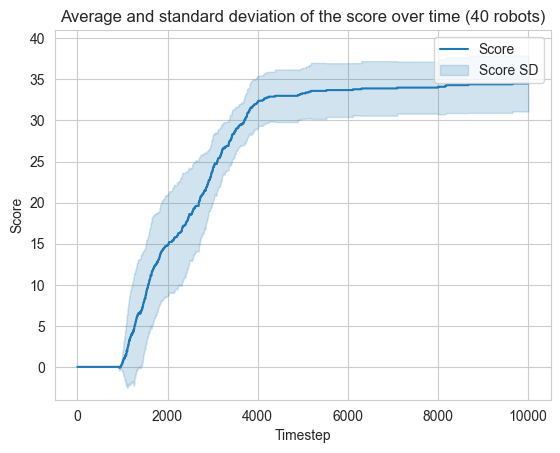

In [12]:
scores = build_scores(size)

#scores = scores[1000:1200]

scores.reset_index()
scores = pd.melt(scores, id_vars='t', value_vars=["Score"+str(i) for i in range(1, 11)])

ax = sns.lineplot(data = scores, x="t", y="value", errorbar="sd")
ax.set_ylabel("Score")
ax.set_xlabel("Timestep")
ax.set_title("Average and standard deviation of the score over time ("+str(size)+" robots)")
ax.set_ylim([-size//10, size+1])
ax.legend(["Score", "Score SD"])
fig = ax.get_figure()
fig.savefig("results/score_"+str(size)+".jpg", dpi=1500) 

In [13]:
def build_robots(size):
    robots = [pd.DataFrame({'t': list(range(10001))})]
    for i in range(1, 11):
        robots.append(pd.DataFrame({"Robot"+str(i):pd.read_csv("experiments_settings/outputs/strategy4/size_"+str(size)+"_seed_" + str(i) + ".txt", sep="\t")["Robots"]}))
    robots = pd.concat(robots, axis=1)
    return robots

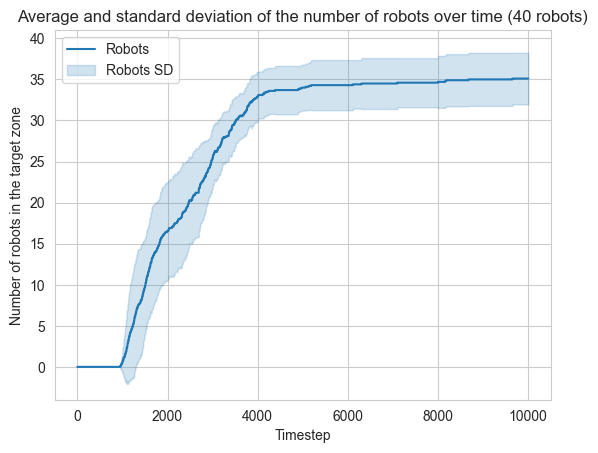

In [14]:
robots = build_robots(size)

#robots = robots[1000:1200]

robots.reset_index()
robots = pd.melt(robots, id_vars='t', value_vars=["Robot"+str(i) for i in range(1, 11)])

ax2 = sns.lineplot(data = robots, x="t", y="value", errorbar="sd")
ax2.set_ylabel("Number of robots in the target zone")
ax2.set_xlabel("Timestep")
ax2.set_title("Average and standard deviation of the number of robots over time ("+str(size)+" robots)")
ax2.set_ylim([-size//10, size+1])
ax2.legend(["Robots", "Robots SD"])
fig2 = ax2.get_figure()
fig2.savefig("results/robot_"+str(size)+".jpg", dpi=1500) 

In [15]:
def build_obstacles(size):
    obstacles = [pd.DataFrame({'t': list(range(10001))})]
    for i in range(1, 11):
        obstacles.append(pd.DataFrame({"Obstacle"+str(i):pd.read_csv("experiments_settings/outputs/strategy4/size_"+str(size)+"_seed_" + str(i) + ".txt", sep="\t")["Obstacles"]}))
    obstacles = pd.concat(obstacles, axis=1)
    return obstacles

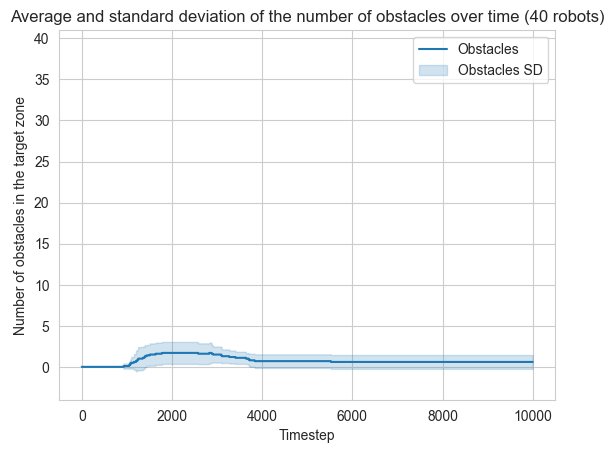

In [16]:
obstacles = build_obstacles(size)

#obstacles = obstacles[1000:1200]

obstacles.reset_index()
obstacles = pd.melt(obstacles, id_vars='t', value_vars=["Obstacle"+str(i) for i in range(1, 11)])

ax3 = sns.lineplot(data = obstacles, x="t", y="value", errorbar="sd")
ax3.set_ylabel("Number of obstacles in the target zone")
ax3.set_xlabel("Timestep")
ax3.set_title("Average and standard deviation of the number of obstacles over time ("+str(size)+" robots)")
ax3.set_ylim([-size//10, size+1])
ax3.legend(["Obstacles", "Obstacles SD"])
fig3 = ax3.get_figure()
fig3.savefig("results/obstacles_"+str(size)+".jpg", dpi=1500) 

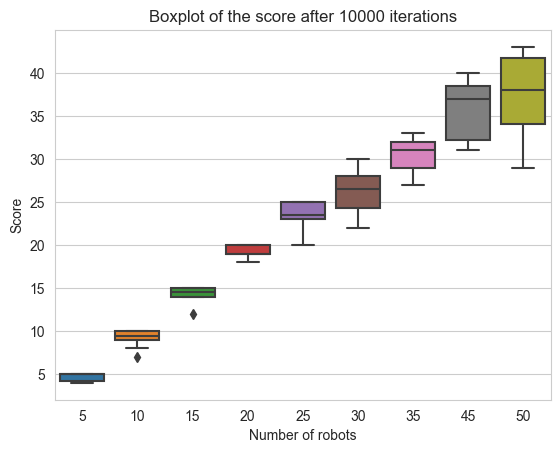

In [19]:
final_scores = {}
for s in [5, 10, 15, 20, 25, 30, 35, 45, 50]:
    sc = build_scores(s)
    sc.reset_index()
    sc = pd.melt(sc, id_vars='t', value_vars=["Score"+str(i) for i in range(1, 11)])
    final_scores[str(s)] = (sc[sc["t"]==max(sc["t"])])["value"]
final_scores = pd.DataFrame(final_scores)
final_scores
ax4 = sns.boxplot(final_scores)
ax4.set_title("Boxplot of the score after 10000 iterations")
ax4.set_xlabel("Number of robots")
ax4.set_ylabel("Score")
fig4 = ax4.get_figure()
fig4.savefig("results/boxplot.jpg", dpi=1500) 